## Task 6.4 Linear Regression Analysis

<a id='0'></a> <br>
 # Table of Contents  

1. [Import data and libraries](#1)
1. [Data cleaning](#2)
1. [Exploratory Data Visualization](#3)
    1. [Hypothesis](#4)
1. [Reshape Variables](#5)
1. [Split Data](#6)
1. [Regression Analysis](#7)
1. [Model Performance Statistics](#8)
1. [Compare Predicted Values to Actual Values](#9)
1. [Model Performance Evaluation](#10)

<a id='1'></a> <br>
## 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'G:\My Drive\CareerFoundry\Python Projects\2024-3 Data Immersion Task 6.4'

In [35]:
# set # of rows and columns to show

pd.set_option('display.max_columns', 137)
pd.set_option('display.max_rows', 140)

In [80]:
# Import data

df_sb = pd.read_pickle(os.path.join(path, '02 Data', 'Original Data', 'df_sbs_v7.pkl'))

In [81]:
df_sb.head()

,Player_Stats (Tm),Player_Stats (SB),Player_Stats (Key),Player_Stats (Player),Player_Stats (No.),Player_Stats (Age),Player_Stats (Pos),O/D/SPT,Player_Stats (College/Univ),Player_Stats (Univ_State),Player_Stats (BirthDate),Player_Stats (Yrs_Active),Player_Stats (Super_bowl),Player_Stats (Team),Player_Stats (Pts),Player_Stats (MVP),Player_Stats (Stadium),Player_Stats (City),Player_Stats (State),Player_Stats (Date),Player_Stats (W/L),O_Passing (Cmp),O_Passing (Att),O_Passing (Yds),O_Passing (TD),O_Passing (Int),O_Passing (Sk),O_Passing (Yds.1),O_Passing (Lng),O_Passing (Rate),O_Rushing (Att),O_Rushing (Yds),O_Rushing (TD),O_Rushing (Lng),O_Receiving (Rec),O_Receiving (Yds),O_Receiving (TD),O_Receiving (Lng),O_Fumbles (Fmb),O_Fumbles (FL),D_Interceptions (Int),D_Interceptions (Yds),D_Interceptions (TD),D_Interceptions (Lng),D_Sacks (Sk),D_Tackles (Comb),D_Tackles (Solo),D_Tackles (Ast),D_Fumbles (FR),D_Fumbles (Yds),D_Fumbles (TD),D_Fumbles (FF),SPT_Kick_Returns (Rt),SPT_Kick_Returns (Yds),SPT_Kick_Returns (Y/Rt),SPT_Kick_Returns (TD),SPT_Kick_Returns (Lng),SPT_Punt_Returns (Ret),SPT_Punt_Returns (Yds),SPT_Punt_Returns (Y/R),SPT_Punt_Returns (TD),SPT_Punt_Returns (Lng),SPT_Scoring (XPM),SPT_Scoring (XPA),SPT_Scoring (FGM),SPT_Scoring (FGA),SPT_Punting (Pnt),SPT_Punting (Yds),SPT_Punting (Y/P),SPT_Punting (Lng),Unique_Key,Univ_Alum_per_Team,Univ_Alum_per_SB,Univ_Total_Rings,Univ_Total_Wins,Univ_Total_MVPs,State_Alum_per_Team,State_Alum_per_SB,State_Total_Rings,State_Total_Wins,State_Total_MVPs,Total_Wins_by_Team,Total_#_of_players,Alum_%,Avg_Player_Age_by_Team,Avg_Player_Yrs_by_Team,TEAM_O_Passing (Cmp),TEAM_O_Passing (Att),TEAM_O_Passing (Yds),TEAM_O_Passing (TD),TEAM_O_Passing (Int),TEAM_O_Passing (Sk),TEAM_O_Passing (Yds.1),TEAM_O_Passing (Lng),TEAM_O_Passing (Rate),TEAM_O_Rushing (Att),TEAM_O_Rushing (Yds),TEAM_O_Rushing (TD),TEAM_O_Rushing (Lng),TEAM_O_Receiving (Rec),TEAM_O_Receiving (Yds),TEAM_O_Receiving (TD),TEAM_O_Receiving (Lng),TEAM_O_Fumbles (Fmb),TEAM_O_Fumbles (FL),TEAM_D_Interceptions (Int),TEAM_D_Interceptions (Yds),TEAM_D_Interceptions (TD),TEAM_D_Interceptions (Lng),TEAM_D_Sacks (Sk),TEAM_D_Tackles (Comb),TEAM_D_Tackles (Solo),TEAM_D_Tackles (Ast),TEAM_D_Fumbles (FR),TEAM_D_Fumbles (Yds),TEAM_D_Fumbles (TD),TEAM_D_Fumbles (FF),TEAM_SPT_Kick_Returns (Rt),TEAM_SPT_Kick_Returns (Yds),TEAM_SPT_Kick_Returns (Y/Rt),TEAM_SPT_Kick_Returns (TD),TEAM_SPT_Kick_Returns (Lng),TEAM_SPT_Punt_Returns (Ret),TEAM_SPT_Punt_Returns (Yds),TEAM_SPT_Punt_Returns (Y/R),TEAM_SPT_Punt_Returns (TD),TEAM_SPT_Punt_Returns (Lng),TEAM_SPT_Scoring (XPM),TEAM_SPT_Scoring (XPA),TEAM_SPT_Scoring (FGM),TEAM_SPT_Scoring (FGA),TEAM_SPT_Punting (Pnt),TEAM_SPT_Punting (Yds),TEAM_SPT_Punting (Y/P),TEAM_SPT_Punting (Lng),Rush_Att_Category
0,ARI,43,ARI43,Aaron Francisco,47,25,DB,Defense,BYU,UT,7/5/1983,3,XLIII,Arizona Cardinals,23,Santonio Holmes,Raymond James Stadium,Tampa,Florida,2/1/2009,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,1,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0,ARI43Aaron Francisco,1,3,40,31,3,1,4,77,43,3,0,54,1.85,27.3,4.17,31,43,377,3,1,2,3,64,112.3,12,33,0,9,31,377,3,194,2,1,1,-1,0,-1,3.0,66,52,14,1,0,0,0,5,91,29.5,0,32,2,34,17.0,0,34,3,3,0,0,5,180,36.0,45,Low Rush Att
1,ARI,43,ARI43,Adrian Wilson,24,29,SS,Defense,North Carolina St.,NC,10/12/1979,7,XLIII,Arizona Cardinals,23,Santonio Holmes,Raymond James Stadium,Tampa,Florida,2/1/2009,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,7,7,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0,ARI43Adrian Wilson,1,1,22,19,0,1,5,123,50,0,0,54,1.85,27.3,4.17,31,43,377,3,1,2,3,64,112.3,12,33,0,9,31,377,3,194,2,1,1,-1,0,-1,3.0,66,52,14,1,0,0,0,5,91,29.5,0,32,2,34,17.0,0,34,3,3,0,0,5,180,36.0,45,Low Rush Att
2,ARI,43,ARI43,Alan Branch,78,24,DT,Defense,Michigan,MI,12/29/1984,1,XLIII,Arizona Cardinals,23,Santonio Holmes,Raymond James Stadium,Tampa,Florida,2/1/2009,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0,

In [82]:
df_sb.shape

(6538, 136)

<a id='2'></a> <br>
## 2. Data cleaning

##### Missing values

In [83]:
# Check for missing values

df_sb.isnull().sum()

# No missing values to handle

Player_Stats (Tm)                0
Player_Stats (SB)                0
Player_Stats (Key)               0
Player_Stats (Player)            0
Player_Stats (No.)               0
Player_Stats (Age)               0
Player_Stats (Pos)               0
O/D/SPT                          0
Player_Stats (College/Univ)     13
Player_Stats (Univ_State)       13
Player_Stats (BirthDate)         0
Player_Stats (Yrs_Active)        0
Player_Stats (Super_bowl)        0
Player_Stats (Team)              0
Player_Stats (Pts)               0
Player_Stats (MVP)               0
Player_Stats (Stadium)           0
Player_Stats (City)              0
Player_Stats (State)             0
Player_Stats (Date)              0
Player_Stats (W/L)               0
O_Passing (Cmp)                  0
O_Passing (Att)                  0
O_Passing (Yds)                  0
O_Passing (TD)                   0
O_Passing (Int)                  0
O_Passing (Sk)                   0
O_Passing (Yds.1)                0
O_Passing (Lng)     

##### Duplicates check

In [84]:
dups = df_sb.duplicated()

In [85]:
dups.value_counts()

False    6538
Name: count, dtype: int64

In [86]:
dups.shape # No dups

(6538,)

### None of my variables connect with enough records. Not all players have any positive stats (non-starters), and without them my records would be just over 3000 (need 5000 for viable test). For the sake of the lesson I will use Years Active as my independent variable and Age as my dependent.

In [87]:
df_sb.head()

,Player_Stats (Tm),Player_Stats (SB),Player_Stats (Key),Player_Stats (Player),Player_Stats (No.),Player_Stats (Age),Player_Stats (Pos),O/D/SPT,Player_Stats (College/Univ),Player_Stats (Univ_State),Player_Stats (BirthDate),Player_Stats (Yrs_Active),Player_Stats (Super_bowl),Player_Stats (Team),Player_Stats (Pts),Player_Stats (MVP),Player_Stats (Stadium),Player_Stats (City),Player_Stats (State),Player_Stats (Date),Player_Stats (W/L),O_Passing (Cmp),O_Passing (Att),O_Passing (Yds),O_Passing (TD),O_Passing (Int),O_Passing (Sk),O_Passing (Yds.1),O_Passing (Lng),O_Passing (Rate),O_Rushing (Att),O_Rushing (Yds),O_Rushing (TD),O_Rushing (Lng),O_Receiving (Rec),O_Receiving (Yds),O_Receiving (TD),O_Receiving (Lng),O_Fumbles (Fmb),O_Fumbles (FL),D_Interceptions (Int),D_Interceptions (Yds),D_Interceptions (TD),D_Interceptions (Lng),D_Sacks (Sk),D_Tackles (Comb),D_Tackles (Solo),D_Tackles (Ast),D_Fumbles (FR),D_Fumbles (Yds),D_Fumbles (TD),D_Fumbles (FF),SPT_Kick_Returns (Rt),SPT_Kick_Returns (Yds),SPT_Kick_Returns (Y/Rt),SPT_Kick_Returns (TD),SPT_Kick_Returns (Lng),SPT_Punt_Returns (Ret),SPT_Punt_Returns (Yds),SPT_Punt_Returns (Y/R),SPT_Punt_Returns (TD),SPT_Punt_Returns (Lng),SPT_Scoring (XPM),SPT_Scoring (XPA),SPT_Scoring (FGM),SPT_Scoring (FGA),SPT_Punting (Pnt),SPT_Punting (Yds),SPT_Punting (Y/P),SPT_Punting (Lng),Unique_Key,Univ_Alum_per_Team,Univ_Alum_per_SB,Univ_Total_Rings,Univ_Total_Wins,Univ_Total_MVPs,State_Alum_per_Team,State_Alum_per_SB,State_Total_Rings,State_Total_Wins,State_Total_MVPs,Total_Wins_by_Team,Total_#_of_players,Alum_%,Avg_Player_Age_by_Team,Avg_Player_Yrs_by_Team,TEAM_O_Passing (Cmp),TEAM_O_Passing (Att),TEAM_O_Passing (Yds),TEAM_O_Passing (TD),TEAM_O_Passing (Int),TEAM_O_Passing (Sk),TEAM_O_Passing (Yds.1),TEAM_O_Passing (Lng),TEAM_O_Passing (Rate),TEAM_O_Rushing (Att),TEAM_O_Rushing (Yds),TEAM_O_Rushing (TD),TEAM_O_Rushing (Lng),TEAM_O_Receiving (Rec),TEAM_O_Receiving (Yds),TEAM_O_Receiving (TD),TEAM_O_Receiving (Lng),TEAM_O_Fumbles (Fmb),TEAM_O_Fumbles (FL),TEAM_D_Interceptions (Int),TEAM_D_Interceptions (Yds),TEAM_D_Interceptions (TD),TEAM_D_Interceptions (Lng),TEAM_D_Sacks (Sk),TEAM_D_Tackles (Comb),TEAM_D_Tackles (Solo),TEAM_D_Tackles (Ast),TEAM_D_Fumbles (FR),TEAM_D_Fumbles (Yds),TEAM_D_Fumbles (TD),TEAM_D_Fumbles (FF),TEAM_SPT_Kick_Returns (Rt),TEAM_SPT_Kick_Returns (Yds),TEAM_SPT_Kick_Returns (Y/Rt),TEAM_SPT_Kick_Returns (TD),TEAM_SPT_Kick_Returns (Lng),TEAM_SPT_Punt_Returns (Ret),TEAM_SPT_Punt_Returns (Yds),TEAM_SPT_Punt_Returns (Y/R),TEAM_SPT_Punt_Returns (TD),TEAM_SPT_Punt_Returns (Lng),TEAM_SPT_Scoring (XPM),TEAM_SPT_Scoring (XPA),TEAM_SPT_Scoring (FGM),TEAM_SPT_Scoring (FGA),TEAM_SPT_Punting (Pnt),TEAM_SPT_Punting (Yds),TEAM_SPT_Punting (Y/P),TEAM_SPT_Punting (Lng),Rush_Att_Category
0,ARI,43,ARI43,Aaron Francisco,47,25,DB,Defense,BYU,UT,7/5/1983,3,XLIII,Arizona Cardinals,23,Santonio Holmes,Raymond James Stadium,Tampa,Florida,2/1/2009,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,1,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0,ARI43Aaron Francisco,1,3,40,31,3,1,4,77,43,3,0,54,1.85,27.3,4.17,31,43,377,3,1,2,3,64,112.3,12,33,0,9,31,377,3,194,2,1,1,-1,0,-1,3.0,66,52,14,1,0,0,0,5,91,29.5,0,32,2,34,17.0,0,34,3,3,0,0,5,180,36.0,45,Low Rush Att
1,ARI,43,ARI43,Adrian Wilson,24,29,SS,Defense,North Carolina St.,NC,10/12/1979,7,XLIII,Arizona Cardinals,23,Santonio Holmes,Raymond James Stadium,Tampa,Florida,2/1/2009,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,7,7,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0,ARI43Adrian Wilson,1,1,22,19,0,1,5,123,50,0,0,54,1.85,27.3,4.17,31,43,377,3,1,2,3,64,112.3,12,33,0,9,31,377,3,194,2,1,1,-1,0,-1,3.0,66,52,14,1,0,0,0,5,91,29.5,0,32,2,34,17.0,0,34,3,3,0,0,5,180,36.0,45,Low Rush Att
2,ARI,43,ARI43,Alan Branch,78,24,DT,Defense,Michigan,MI,12/29/1984,1,XLIII,Arizona Cardinals,23,Santonio Holmes,Raymond James Stadium,Tampa,Florida,2/1/2009,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0,

##### Extreme values checks

C:\Users\pjbac\AppData\Local\Temp\ipykernel_27752\1230501396.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sb['Player_Stats (Age)'], bins=25) # Shows extreme values


<Axes: xlabel='Player_Stats (Age)', ylabel='Density'>

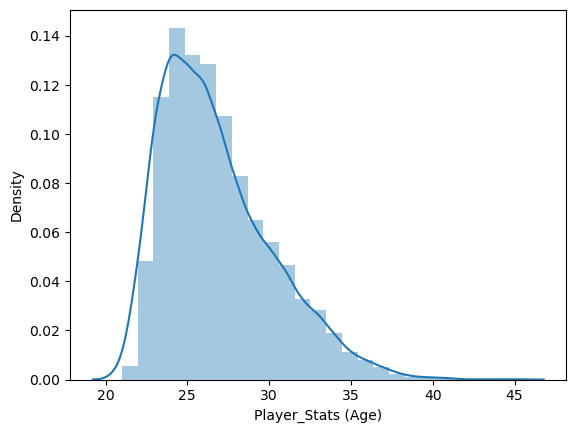

In [88]:
sns.distplot(df_sb['Player_Stats (Age)'], bins=25) # Shows extreme values

In [89]:
df_sb['Player_Stats (Age)'].mean() # Check the mean

26.764912817375343

In [90]:
df_sb['Player_Stats (Age)'].median() # Check the median

26.0

In [91]:
df_sb['Player_Stats (Age)'].max() # Check the max

45

<a id='3'></a> <br>
## 3. Exploratory Data Visualization

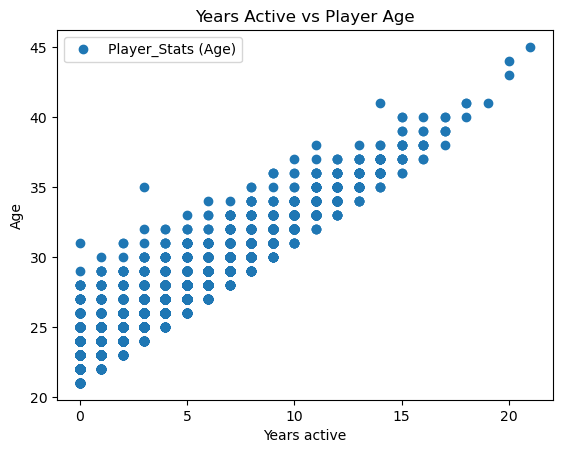

In [92]:
# Create a scatterplot using matplotlib

df_sb.plot(x = 'Player_Stats (Yrs_Active)', y='Player_Stats (Age)',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Years Active vs Player Age')  
plt.xlabel('Years active')  
plt.ylabel('Age')  
plt.show()

<a id='4'></a> <br>
>### A. Hypothesis: The older a player is, the more years he has been active.

<a id='5'></a> <br>
## 4. Reshape Variables

In [94]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_sb['Player_Stats (Yrs_Active)'].values.reshape(-1,1)
y = df_sb['Player_Stats (Age)'].values.reshape(-1,1)

In [95]:
X

array([[3],
       [7],
       [1],
       ...,
       [0],
       [9],
       [0]], dtype=int64)

In [96]:
y

array([[25],
       [29],
       [24],
       ...,
       [23],
       [31],
       [22]], dtype=int64)

<a id='6'></a> <br>
## 5. Split Data

In [97]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

<a id='7'></a> <br>
## 6. Regression Analysis

In [98]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

#### Fit Model to Training Set

In [99]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

#### Create Prediction for Test Set

In [100]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

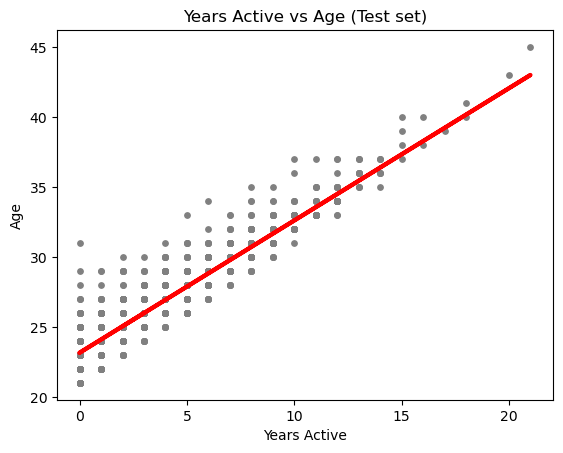

In [101]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Years Active vs Age (Test set)')
plot_test.xlabel('Years Active')
plot_test.ylabel('Age')
plot_test.show()

>## The line seems to fit the data fairly well. Though it looks like many data points are further away from the line, the points are only at most only 8 or 9 numbers off because the age range is so limited. From this you can see that the less years active a player has the more variety his age can be and conversely, the more years active he is the closer the data points get to the regression line. This makes sense as many players in the NFL until start right after College but some may not get signed til several years later. On the other hand, if someone has been in the league for over 10 years, the more likely they started in their early 20s.

<a id='8'></a> <br>
## 7. Model Performance Statistics

In [102]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [103]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.94482142]]
Mean squared error:  1.3117618023199995
R2 score:  0.8859380592212728


In [104]:
y_predicted

array([[25.0459573 ],
       [25.99077872],
       [26.93560014],
       ...,
       [25.0459573 ],
       [25.0459573 ],
       [25.99077872]])

In [105]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,25,25.045957
1,26,25.990779
2,26,26.935600
3,31,29.770064
4,28,26.935600
5,34,34.494172
6,32,32.604529
7,24,24.101136
8,26,25.990779
9,22,23.156314


<a id='9'></a> <br>
## 8. Compare Predicted Values to Actual Values

In [106]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [107]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [108]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.94482142]]
Mean squared error:  1.2542985128524282
R2 score:  0.8943881300371737


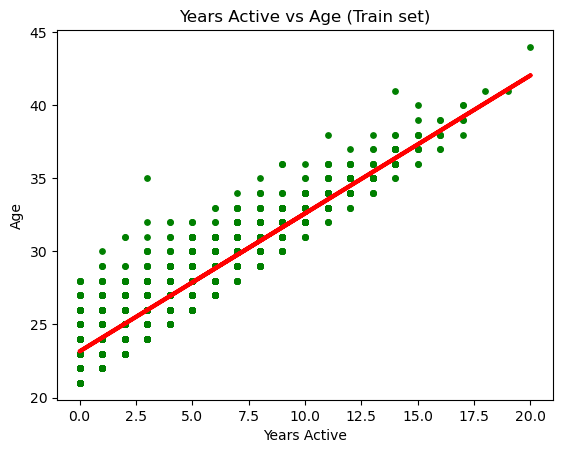

In [110]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Years Active vs Age (Train set)')
plot_test.xlabel('Years Active')
plot_test.ylabel('Age')
plot_test.show()

<a id='10'></a> <br>
## 9. Model Performance Evaluation

### Just going by the numbers, this model performed extremely well. The MSE of 1.25 and the R2 score of .89 are nearly perfect. If this were a true test, this model would most likely move on to implementation, however, the variables I was forced to use had an obvious relationship that would have never been explored in the first place. 

### That said, bias is hard to find in this scenario as all of these statistics are facts and come from a reliable source. You could, however, consider the NFL's selection of players biased. Every year the NFL drafts around 234 new players but they all come from colleges, either having just graduated or as Juniors (20-23 yrs old). As there is no age limit to be an active NFL player, football is young man's game and no team is going to hold open tryouts for people in their 30s+.

### It's not really age-discrimination but it does greatly limit the data's variance.